In [10]:
import numpy as np

In [11]:
#случайные точки из двумерного нормального распределения
mu_0 = -1
mu_1 = 1
d = 1
x_0 = np.random.normal(mu_0, d, (1000,2))
x_1 = np.random.normal(mu_1, d, (1000,2))
x_0, x_1

(array([[-2.07774884, -1.4683221 ],
        [-0.0593032 , -0.17636362],
        [-1.35865437, -0.89744263],
        ...,
        [ 0.44577625, -1.90238324],
        [-1.51213159,  0.41862545],
        [-0.87518073, -1.40357458]]), array([[ 2.09327606, -0.14630349],
        [-0.22820758,  1.32616555],
        [ 2.27468709, -0.19602275],
        ...,
        [ 1.8188575 ,  1.99051922],
        [ 2.26510926,  0.86855192],
        [ 4.06724592,  0.9966902 ]]))

In [12]:
#создаем таргеты для точек
y_0 = np.ones(len(x_0))
y_1 = np.zeros(len(x_1))

In [13]:
#совмещаем точки в один array и перемешиваем
data_0 = np.array(list(zip(x_0,y_0)))
data_1 = np.array(list(zip(x_1,y_1)))
data = np.vstack([data_0, data_1])
np.random.shuffle(data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
def sigmoid(z): 
  return 1./(1+np.exp(-z))

In [15]:
def loss(t, y): # функция потерь MSE - минимизируем мсе, чтобы полученные значения весов стремились к наиболее вероятным (Мат ожидание)
 return np.sum((t-y)**2)*0.5

In [16]:
def loss(t, y): # функция потерь log_loss
 return -(t*np.log(y)+(1-t)*np.log(1-y))

In [17]:
def diff_loss(t, y): # производная от log_loss равна производной MSE, если функция активации сигмоида
  return np.sum(y-t)

In [18]:
class Layer:
  def __init__(self, neurons_inp, neurons_out, lr=0.01):
    self.shape = (neurons_inp, neurons_out) 
    self.lr = lr
    self.w = np.zeros(self.shape, dtype=np.float32)
    self.b = np.zeros((1, neurons_out), dtype=np.float)
    self._clear_grads()

  def _clear_grads(self): # функция очистки градиентов
      self.inp = None
      self.activations = None
      self.d_sigma = None
      self.d_w = None
      self.d_b = None

  def __call__(self, x): # функция прямого прохода
      if len(x.shape) == 1:
          x = x.reshape(1, -1)
      self.inp = x
      self.activations = sigmoid(x.dot(self.w)+self.b) #функция активации сигмоида, перемножаем входные данные с весами и прибавляем смещение, всё это запихиваем в сигмоиду
      return self.activations
    
  def backward(self, grad): #обратный проход, откуда град передаем из diff_loss
      self.d_sigma = self.activations*(1 - self.activations) #производная сигмоиды - функции активации
      self.d_w = self.grad_w(grad) #производная весов
      self.d_b = self.grad_b(grad) #производная смещения
      result = self.grad_x(grad)
      return result #возвращаем градиент по икс от diff_loss
  
  def grad_w(self, grad):
      return grad * self.inp.T * self.d_sigma

  def grad_b(self, grad):
      return grad * self.d_sigma
  
  def grad_x(self, grad):
      return self.w.dot(grad) * self.d_sigma
  
  def step(self): #обновляем веса и смещение
      self.w = self.w - self.d_w * self.lr
      self.b = self.b - self.d_b * self.lr
      self._clear_grads()

In [19]:
#инициализируем однослойную нейросеть с 2 нейронами на вход и одним на выход
l1 = Layer(2, 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [20]:
#обучаем нейросеть 10 эпох
for i in range(10):
  for X, Y in data:
    y = l1(X) #прямой проход
    d_y = diff_loss(Y, y) #функция потерь
    l1.backward(d_y) #обратный проход
    l1.step() #обновление весов и смещения
    print('======')
    print(i)
    print('loss', d_y)
    print('pred', Y, l1(X))

Выходные данные были обрезаны до нескольких последних строк (5000).
9
loss -0.30240463578586907
pred 1.0 [[0.6977575]]
9
loss -0.5035774790506659
pred 1.0 [[0.49677962]]
9
loss -0.02503602024669549
pred 1.0 [[0.97496464]]
9
loss -0.029964422650428868
pred 1.0 [[0.9700366]]
9
loss 0.031152047077388497
pred 0.0 [[0.03115027]]
9
loss 0.0017292841823586193
pred 0.0 [[0.00172928]]
9
loss -0.43903537381458435
pred 1.0 [[0.56182543]]
9
loss -0.4505565734448568
pred 1.0 [[0.55014747]]
9
loss -0.3549593146479707
pred 1.0 [[0.6452487]]
9
loss -0.009519615858583186
pred 1.0 [[0.99048044]]
9
loss 0.33504108954498407
pred 0.0 [[0.33485236]]
9
loss 0.00022697856336259515
pred 0.0 [[0.00022698]]
9
loss -0.013015362482995063
pred 1.0 [[0.98698477]]
9
loss -0.0005392461363261658
pred 1.0 [[0.99946075]]
9
loss -0.0015040368399918957
pred 1.0 [[0.99849596]]
9
loss 0.13720754980135128
pred 0.0 [[0.13717172]]
9
loss 0.17614571265973164
pred 0.0 [[0.17608567]]
9
loss -0.12362823471605433
pred 1.0 [[0.876398

In [22]:
#для точки 0,0 рассчитываем угол наклона разделяющй прямой
x1 = np.array([0,0])
y = l1(x1)
d_y = diff_loss(Y, y)
w1 = l1.backward(d_y)

In [35]:
l1.backward(d_y)

array([[-0.18240075],
       [-0.17295641]])

In [23]:
#для точки 2, -2 рассчитываем угол наклона разделяющй прямой
x2 = np.array([2,-2])
y = l1(x2)
d_y = diff_loss(Y, y)
w2 = l1.backward(d_y)

[[-3 -2 -1  0]
 [ 1  2  3  4]]


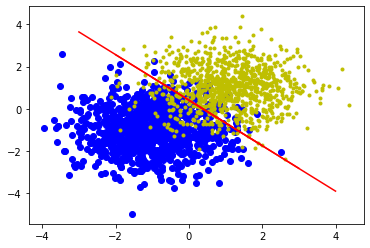

In [34]:
#рисуем результирующую прямую
import matplotlib.pyplot as plt
x_0_p = x_0[:, 0]
y_0_p = x_0[:, 1]

x_res = np.arange(-3, 5)
x_res = x_res.reshape(2,-1)
y_res = (-w1*x_res-l1.b)/w2

plt.plot(x_0_p,y_0_p, 'bo')
plt.plot(x_1[:, 0], x_1[:, 1],'y.')
plt.plot(x_res, y_res,'r-')
plt.show()

In [36]:
y_res

array([[ 3.64623046,  2.56307243,  1.47991439,  0.39675636],
       [-0.66473665, -1.74789468, -2.83105272, -3.91421075]])